# JBI100 Visualization 
### Academic year 2025-2026

## Health and Global Statistics
Data sources:

- Hospital Beds Management (https://www.kaggle.com/datasets/jaderz/hospital-beds-management/data)
- CIA Global Statistical Database (https://www.kaggle.com/datasets/kushagraarya10/cia-global-statistical-database)

Data dictionaries and additional info can be found in the respective data folders.
Note: you only need to select one dataset for your project; the dataset that you choose consists of multiple CSV files.

In [2018]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import plotly.io as pio
from scipy import stats

# Render plotly in IFrame
pio.renderers.default = 'iframe'

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python -m pip install lib' where lib is the according library name.

In [2019]:
# Load the data

# CIA Global Statistical Database
df_CIA_communications        = pd.read_csv("C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\communications_data.csv", delimiter=',', low_memory=False)
df_CIA_demographics          = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\demographics_data.csv', delimiter=',', low_memory=False)
df_CIA_economy               = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\economy_data.csv', delimiter=',', low_memory=False)
df_CIA_energy                = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\energy_data.csv', delimiter=',', low_memory=False)
df_CIA_geography             = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\geography_data.csv', delimiter=',', low_memory=False)
df_CIA_government_and_civics = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\government_and_civics_data.csv', delimiter=',', low_memory=False)
df_CIA_transportation        = pd.read_csv('C:\\Users\\kwane\\PycharmProjects\\dashframework\\CIA Global Statistical Database\\transportation_data.csv', delimiter=',', low_memory=False)

In [2020]:
# df_CIA_demographics.sample(5)

In [2021]:
# df_CIA_demographics.describe()

In [2022]:
# fig = px.bar(df_CIA_demographics, x="Country", y="Total_Population", color="Median_Age", color_continuous_scale='Viridis', log_y=True,width=1500, height=800).update_xaxes(categoryorder="total descending")
# fig.show()

## Merge datasets

In [2023]:
# Datasets: df_CIA_communications, df_CIA_demographics, df_CIA_economy, df_CIA_energy, df_CIA_geography, df_CIA_government_and_civics, df_CIA_transportation

# Check if all Country columns are the same
print("Country columns are the same:")
print(df_CIA_communications["Country"].equals(df_CIA_demographics["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_economy["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_energy["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_geography["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_government_and_civics["Country"]))
print(df_CIA_communications["Country"].equals(df_CIA_transportation["Country"]))

Country columns are the same:
True
True
True
True
False
True


In [2024]:
# Check what is missing in the df_CIA_government_and_civics dataset
print("Missing countries in df_CIA_government_and_civics:")
for i in range(len(df_CIA_communications["Country"])):
    if df_CIA_communications["Country"][i] not in df_CIA_government_and_civics["Country"].values:
        print(df_CIA_communications["Country"][i])

Missing countries in df_CIA_government_and_civics:
BRITISH INDIAN OCEAN TERRITORY
HAITI
NAMIBIA
NEW ZEALAND
SPAIN
SPRATLY ISLANDS


In [2025]:
# Merge datasets into df_total
df_total = pd.merge(df_CIA_communications, df_CIA_demographics, on="Country")
df_total = pd.merge(df_total, df_CIA_economy, on="Country")
df_total = pd.merge(df_total, df_CIA_energy, on="Country")
df_total = pd.merge(df_total, df_CIA_geography, on="Country")
df_total = pd.merge(df_total, df_CIA_government_and_civics, on="Country", how="left")
df_total = pd.merge(df_total, df_CIA_transportation, on="Country")

## Check for NaNs

In [2026]:
# Make a series with the number of NaNs per cat
nan_per_cat = df_total.isna().sum()

# Print NaNs per cat
for key, value in sorted(nan_per_cat.items(), key=lambda x: x[1], reverse=False):
    print(f"{key:<50} : {value:>5} NaNs")

# Look at the cat with the most NaNs (water_pipelines_km)
# print(df_CIA_transportation.columns)
# for i in df_CIA_transportation["water_pipelines_km"]:
#     if not pd.isna(i):
#         print(i)
# print("water_pipelines_km is NaN:", df_CIA_transportation["water_pipelines_km"].isna().sum())
# print("water_pipelines_km total:", len(df_CIA_transportation["water_pipelines_km"]))

Country                                            :     0 NaNs
Geographic_Coordinates                             :     3 NaNs
Area_Total                                         :     3 NaNs
Coastline                                          :     4 NaNs
Lowest_Elevation                                   :     4 NaNs
Land_Boundaries                                    :     9 NaNs
Land_Area                                          :    12 NaNs
Water_Area                                         :    14 NaNs
Highest_Elevation                                  :    20 NaNs
Other_Land                                         :    20 NaNs
Agricultural_Land                                  :    21 NaNs
Total_Population                                   :    22 NaNs
Population_Growth_Rate                             :    22 NaNs
internet_country_code                              :    29 NaNs
Death_Rate                                         :    29 NaNs
Net_Migration_Rate                      

In [ ]:
# Make a series with the number of NaNs per country
nan_per_country = df_total.isna().sum(axis=1)

# Print NaNs per country
for key, value in sorted(nan_per_country.items(), key=lambda x: x[1], reverse=False):
    print(f"{df_total["Country"][key]:<50} : {value:>5} NaNs")

## Explore dataset

In [2028]:
# Column names of df_total
print(df_total.columns)

Index(['Country', 'telephone_fixed_subscriptions_total',
       'mobile_cellular_subscriptions_total', 'internet_country_code',
       'internet_users_total', 'broadband_fixed_subscriptions_total',
       'Total_Population', 'Population_Growth_Rate', 'Birth_Rate',
       'Death_Rate', 'Net_Migration_Rate', 'Median_Age', 'Sex_Ratio',
       'Infant_Mortality_Rate', 'Total_Fertility_Rate', 'Total_Literacy_Rate',
       'Male_Literacy_Rate', 'Female_Literacy_Rate', 'Youth_Unemployment_Rate',
       'Real_GDP_PPP_billion_USD', 'GDP_Official_Exchange_Rate_billion_USD',
       'Real_GDP_Growth_Rate_percent', 'Real_GDP_per_Capita_USD',
       'Unemployment_Rate_percent', 'Youth_Unemployment_Rate_percent',
       'Budget_billion_USD', 'Budget_Surplus_billion_USD',
       'Budget_Deficit_percent_of_GDP', 'Public_Debt_percent_of_GDP',
       'Fiscal_Year', 'Exports_billion_USD', 'Imports_billion_USD',
       'Exchange_Rate_per_USD', 'Population_Below_Poverty_Line_percent',
       'electricity_ac

Summary of carbon_dioxide_emissions_Mt:
count           210.00
mean      287348757.00
std      2603746042.34
min               0.00
25%               7.00
50%              39.50
75%            6171.50
max     35551713000.00
Name: carbon_dioxide_emissions_Mt, dtype: float64
NaNs     49


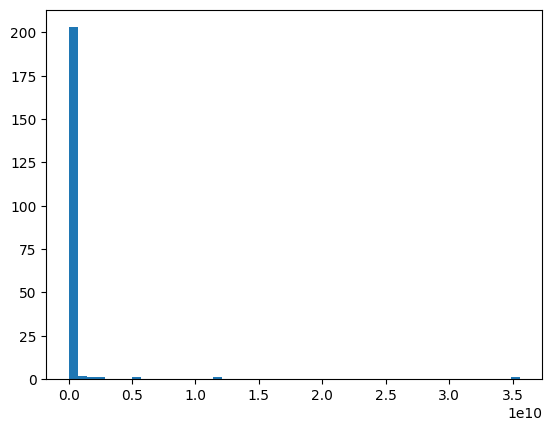

In [2067]:
# Summarize function: prints basic info and hist
def summarize(df: pd.DataFrame, cat: str, exclude_world: bool = False):
    pd.set_option("display.float_format", "{:.2f}".format)
    print(f"Summary of {cat}:")
    print(df[cat].describe())
    if cat in nan_per_cat.keys():
        print(f"NaNs {nan_per_cat[cat]:>6}")
    try:
        if exclude_world:
            df_filtered = df[df["Country"] != "WORLD"]
            plt.hist(df_filtered[cat], bins=50)
            plt.show()
        else:
            plt.hist(df[cat], bins=50)
            plt.show()
    except:
        print("Histogram plotting error")
    # print(df[cat])

# Median_Age, carbon_dioxide_emissions_Mt, Death_Rate
summarize(df_total, "carbon_dioxide_emissions_Mt")

In [2030]:
# Function to get the countries that have values within a range(min, max) for a certain cat
def extreme_values(df: pd.DataFrame, cat: str):
    print(f"Extreme values: {cat}")
    max = df[cat].nlargest(5)
    min = df[cat].nsmallest(5)
    for idx, value in max.items():
        print(f"{df_total["Country"][idx]:<50} : {value:>5}")
    print("...")
    for idx, value in reversed(list(min.items())):
        print(f"{df_total["Country"][idx]:<50} : {value:>5}")

extreme_values(df_total, "mobile_cellular_subscriptions_total")

Extreme values: mobile_cellular_subscriptions_total
CHINA                                              : 1750460000.0
INDIA                                              : 1166310000.0
EUROPEAN UNION                                     : 540557924.0
UNITED STATES                                      : 496800000.0
INDONESIA                                          : 365872608.0
...
SPAIN                                              : 5000.0
SAINT HELENA, ASCENSION, AND TRISTAN DA CUNHA      : 4000.0
AMERICAN SAMOA                                     : 2250.0
WORLD                                              :   8.0
WALLIS AND FUTUNA                                  :   0.0


## Clean data

In [2031]:
# Check outlier function: Goes through all cats and checks for outliers, prints findings
# outlier_check_fails: Contains all cats with more than one non float
def check_outliers(df: pd.DataFrame):
    fail_list = []
    for i in df.columns:
        try:
            z_scores = np.abs(stats.zscore(df[i], nan_policy="omit"))
            outliers = df[z_scores > 3]
            if len(outliers)>0:
                print(outliers[["Country", i]])
            else:
                print(f"No outliers for:    {i}")
            print("---------------------------------------------------")
        except:
            fail_list.append(i)
    print(f"Failed to look for outliers in: {fail_list}")
    print(f"Number of categories failed to check: {len(fail_list)}")
    return fail_list

outlier_check_fails = check_outliers(df_total)

    Country  telephone_fixed_subscriptions_total
255   WORLD                         901317598.00
---------------------------------------------------
            Country  mobile_cellular_subscriptions_total
49            CHINA                        1750460000.00
78   EUROPEAN UNION                         540557924.00
109           INDIA                        1166310000.00
---------------------------------------------------
            Country  broadband_fixed_subscriptions_total
49            CHINA                         483550000.00
78   EUROPEAN UNION                         163772540.00
244   UNITED STATES                         119870000.00
---------------------------------------------------
           Country  Birth_Rate
78  EUROPEAN UNION     2020.00
---------------------------------------------------
            Country  Death_Rate
78   EUROPEAN UNION     2021.00
232         TOKELAU     2021.00
---------------------------------------------------
                            

In [2032]:
# Float check function: Checks and prints number non floats in dataset
# print_bool: True -> Print cat, country and value that is non float
# print_bool: False -> Print total number of non floats per cat
def float_check(df: pd.DataFrame, cat: list, print_bool: bool):
    for i in cat:
        cat_failure_counter = 0
        for index, value in df[i].items():
            try:
                float(value)
            except:
                if print_bool:
                    print(f"Category: {i:<50} Country: {df["Country"][index]:<50} Value: {value:>5}")
                cat_failure_counter += 1
        if not print_bool:
            print(f"Category: {i:<50} Failure counter: {cat_failure_counter:>5}")

float_check(df_total, outlier_check_fails, False)

Category: Country                                            Failure counter:   259
Category: internet_country_code                              Failure counter:   230
Category: internet_users_total                               Failure counter:     3
Category: Total_Population                                   Failure counter:     5
Category: Population_Growth_Rate                             Failure counter:   237
Category: Total_Literacy_Rate                                Failure counter:   168
Category: Male_Literacy_Rate                                 Failure counter:   212
Category: Female_Literacy_Rate                               Failure counter:   212
Category: Youth_Unemployment_Rate                            Failure counter:   206
Category: Fiscal_Year                                        Failure counter:   215
Category: Geographic_Coordinates                             Failure counter:   256
Category: Area_Total                                         Failure counter

In [2033]:
# Check the data per cat
float_check(df_total, ["internet_users_total"], True)

# Check full data per cat
# print(df_total["internet_users_total"])

Category: internet_users_total                               Country: COCOS (KEELING) ISLANDS                            Value: 80 (percentage)
Category: internet_users_total                               Country: PITCAIRN ISLANDS                                   Value: 37 (percentage)
Category: internet_users_total                               Country: WORLD                                              Value: 5.3 (percentage)


In [2034]:
# Data type/format per column:
# Country                                               str
# internet_country_code                                 str
# internet_users_total                                  80 (percentage)
# Total_Population                                      11,334,637
# Population_Growth_Rate                                0.93%
# Total_Literacy_Rate                                   98.8%
# Male_Literacy_Rate                                    97.4%
# Female_Literacy_Rate                                  83.3%
# Youth_Unemployment_Rate                               14.9%
# Fiscal_Year                                           str
# Geographic_Coordinates                                str
# Area_Total                                            1,910 sq km OR 1.267 million sq km
# Land_Area                                             995,450 sq km OR 148.94 million sq km
# Water_Area                                            361,899,999 sq km OR NEGL OR negligible
# Land_Boundaries                                       5,920 km
# Coastline                                             2,800 km OR Ile Amsterdam
# Highest_Elevation                                     1,020 m
# Lowest_Elevation                                      -40 m
# Forest_Land                                           10.2%
# Other_Land                                            17.2%
# Agricultural_Land                                     34.8%
# Arable_Land (%% of Total Agricultural Land)           20.6%
# Permanent_Crops (%% of Total Agricultural Land)       10.3%
# Permanent_Pasture (%% of Total Agricultural Land)     51.7%
# Irrigated_Land                                        12,605 sq km
# Capital                                               str OR (Some strings have descriptions too)
# Capital_Coordinates                                   str
# Government_Type                                       Theocracy OR Republic OR Democracy OR Other OR Monarchy OR Territory
# airports_paved_runways_count                          5,080
# airports_unpaved_runways_count                        8,977
# heliports_count                                       5,664
# roadways_km                                           4,960,600
# railways_km                                           150,000
# waterways_km                                          110,000

In [2109]:
# Data cleaning function: Changes all the weird values into ones that make sense and can be converted to floats
def data_cleaner(df: pd.DataFrame, cat: list):
    fail_counter = 0
    fail_counter_2 = 0
    for i in cat:
        for idx, val in df[i].items():
            if not pd.isnull(val):
                try:
                    df.loc[idx, i] = float(val)
                except:
                    fail_counter += 1
                    v = str(val)
                    try:
                        v = v.replace("%", "")
                        v = v.replace(" sq km", "")
                        v = v.replace(" km", "")
                        v = v.replace(" m", "")
                        v = v.replace(",", "")

                        if "illion" in v:
                            # Replace million and multiply by a million
                            v = v.replace("illion", "")
                            v = float(v)
                            v = v*1000000
                            df.loc[idx, i] = v

                        elif "(percentage)" in v:
                            # Replace percentage and turn into chance and multiply by Total_Population
                            v = v.replace(" (percentage)", "")
                            v = float(v)
                            v = round(v*0.01*float(df["Total_Population"][idx]))
                            df.loc[idx, i] = v

                        elif "NEGL" in v or "negligible" in v or "Ile Amsterdam" in v:
                            # Set invalid entries to NaNs
                            df.loc[idx, i] = np.nan

                        elif "Democracy" in v:
                            df.loc[idx, i] = 0

                        elif "Republic" in v:
                            df.loc[idx, i] = 1

                        elif "Theocracy" in v:
                            df.loc[idx, i] = 2

                        elif "Monarchy" in v:
                            df.loc[idx, i] = 3

                        elif "Communist" in v:
                            df.loc[idx, i] = 4

                        elif "Territory" in v:
                            df.loc[idx, i] = 5

                        elif "Other" in v:
                            df.loc[idx, i] = 6

                        else:
                            df.loc[idx, i] = float(v)
                    except:
                        print(f"Category: {i:<50} Country: {df["Country"][idx]:<50} Value: {v:>5}")
                        fail_counter_2 += 1
        df_total[i] = df_total[i].astype(float)
    print(f"{fail_counter_2} out of {fail_counter} faulty variables left")

# These categories shouldn't become floats
remove = ["Country", "internet_country_code", "Fiscal_Year", "Geographic_Coordinates", "Capital", "Capital_Coordinates"]

for i in remove:
    if i in outlier_check_fails:
        outlier_check_fails.remove(i)

data_cleaner(df_total, outlier_check_fails)

0 out of 0 faulty variables left


In [2036]:
# # Check if values were fixed properly
# # Check: (%) -> Population_Growth_Rate, (,) -> Total_Population
# for index, country in df_total["Country"].items():
#     if country in ["HAITI", "NAMIBIA", "NEW ZEALAND", "PHILIPPINES", "SPAIN"]:
#         print(f"Country: {country:<110}, Value: {df_total["Population_Growth_Rate"][index]:>5}")

In [2037]:
# # Check if values were fixed properly (, & sq km & million)
# for index, country in df_total["Country"].items():
#     if country in ["ANTARCTICA", "ARCTIC OCEAN", "ATLANTIC OCEAN", "AFGHANISTAN", "ALBANIA"]:
#         print(f"Country: {country:<110}, Value: {df_total["Area_Total"][index]:>5}")

In [2038]:
# # Check if values were fixed properly
# # Check: (negligible) -> Water_Area, (,) -> Coastline,
# for index, country in df_total["Country"].items():
#     if country in ["DOMINICA", "SAINT BARTHELEMY", "SAINT MARTIN", "FRENCH SOUTHERN AND ANTARCTIC LANDS", "HAITI"]:
#         print(f"Country: {country:<110}, Value: {df_total["Water_Area"][index]:>5}")

In [2039]:
# # Check if values were fixed properly (percentage)
# for index, country in df_total["Country"].items():
#     if country in ["WORLD", "PITCAIRN ISLANDS", "COCOS (KEELING) ISLANDS", "LAOS"]:
#         print(f"Country: {country:<110}, Value: {df_total["Total_Population"][index]:>5}")
#         print(f"Country: {country:<110}, Value: {df_total["internet_users_total"][index]:>5}")
#
# print(round(0.8*596.0))
# print(round(0.37*50.0))
# print(round(0.053*7979261010.0))

## Check ouliers

In [2040]:
check_outliers(df_total);

    Country  telephone_fixed_subscriptions_total
255   WORLD                         901317598.00
---------------------------------------------------
            Country  mobile_cellular_subscriptions_total
49            CHINA                        1750460000.00
78   EUROPEAN UNION                         540557924.00
109           INDIA                        1166310000.00
---------------------------------------------------
            Country  internet_users_total
49            CHINA         1010740000.00
78   EUROPEAN UNION          389063826.00
109           INDIA          560000000.00
244   UNITED STATES          311870000.00
255           WORLD          422900834.00
---------------------------------------------------
            Country  broadband_fixed_subscriptions_total
49            CHINA                         483550000.00
78   EUROPEAN UNION                         163772540.00
244   UNITED STATES                         119870000.00
--------------------------------------

Summary of Net_Migration_Rate:
count   229.00
mean      3.66
std       5.57
min      -2.40
25%       0.63
50%       1.89
75%       4.40
max      45.80
Name: Net_Migration_Rate, dtype: float64
NaNs     30


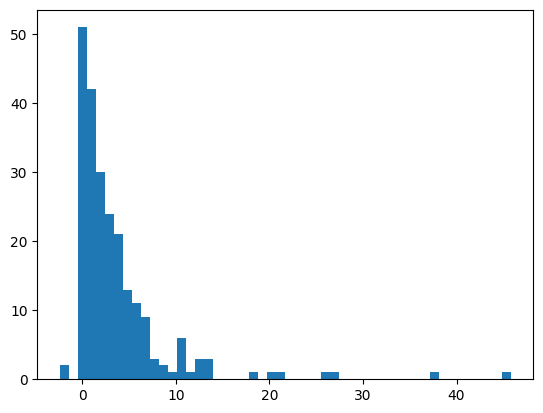

Extreme values: Net_Migration_Rate
SYRIA                                              :  45.8
UKRAINE                                            :  37.3
AMERICAN SAMOA                                     : 27.36
COOK ISLANDS                                       :  26.2
MICRONESIA, FEDERATED STATES OF                    : 20.92
...
BAHAMAS, THE                                       :   0.0
AZERBAIJAN                                         :   0.0
ANDORRA                                            :   0.0
PHILIPPINES                                        : -1.88
HAITI                                              :  -2.4


In [2094]:
check = "Net_Migration_Rate"
summarize(df_total, check, False)
extreme_values(df_total, check)
# print(df_total[df_total["Country"] == "EUROPEAN UNION"][check])
# print(df_total[df_total["Country"] == "WORLD"][check])
# print(df_total["Country"][df_total[check] == -3500.00])

In [ ]:
# Weird observations:
print(f"WORLD has {df_total[df_total["Country"] == "WORLD"]["mobile_cellular_subscriptions_total"].iloc[0]} mobile_cellular_subscriptions_total")
# mobile_cellular_subscriptions_total of WORLD is 8
# WORLD data generally seems to be quite off
# Birth_Rate EUROPEAN UNION
# Death_Rate EUROPEAN UNION & TOKELAU
# How is there only two cases of negative Net_Migration_Rate?
# Total_Fertility_Rate EUROPEAN UNION
# Real_GDP_PPP_billion_USD TOKELAU is more than US, EU and China
# Budget_billion_USD TOKELAU
# Exports_billion_USD TOKELAU
# AUSTRALIA has only 1 heliports_count


# Conclusions:
# Leave the WOLRD data as is and assume it is correct or recalculate if needed
# Leave Net_Migration_Rate be and assume it is correct
# Leave heliports_count as is
# Drop certain EUROPEAN UNION data -> Birth_Rate, Death_Rate, Total_Fertility_Rate, Male_Literacy_Rate, Female_Literacy_Rate
# Drop certain TOKELAU data -> Death_Rate, Real_GDP_PPP_billion_USD, Budget_billion_USD, Exports_billion_USD

In [2107]:
# df_total.sample(5)

# for i in df_total["Country"]:
#     if "OCEAN" in i:
#         print(i)

countries = ["WORLD", "EUROPEAN UNION", "TOKELAU", "SOUTHERN OCEAN", "ARCTIC OCEAN", "ATLANTIC OCEAN", "INDIAN OCEAN", "PACIFIC OCEAN", "BRITISH INDIAN OCEAN TERRITORY"]
df_total[df_total["Country"].isin(countries)].sample(9)


ValueError: Cannot take a larger sample than population when 'replace=False'

In [2108]:
# Data cleaning function: Clean outliers in clean_list
# clean_list -> Holds sepcific values to set to NaN
# del_list -> Holds rows to delete (by country)
def clean_outliers(df: pd.DataFrame, clean_list: list, del_list: list):
    for country, cat in clean_list:
        idx = df[df["Country"] == country].index
        df.loc[idx, cat] = np.nan
    for country in del_list:
        idx = df[df["Country"] == country].index
        df.drop(idx, inplace=True)

clean_list = [["EUROPEAN UNION", "Birth_Rate"],
              ["EUROPEAN UNION", "Death_Rate"],
              ["EUROPEAN UNION", "Total_Fertility_Rate"],
              ["EUROPEAN UNION", "Male_Literacy_Rate"],
              ["EUROPEAN UNION", "Female_Literacy_Rate"],
              ["TOKELAU", "Death_Rate"],
              ["TOKELAU", "Real_GDP_PPP_billion_USD"],
              ["TOKELAU", "Budget_billion_USD"],
              ["TOKELAU", "Exports_billion_USD"]]
del_list = []

clean_outliers(df_total, clean_list, del_list)